<a href="https://colab.research.google.com/github/Sirczechs-Kaustubh/Active_ML_Iris/blob/main/Active_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Load the iris dataset
X, y = load_iris(return_X_y=True)

# List to store MCC scores
#mcc_scores = []


No more samples left to train


<Axes: >

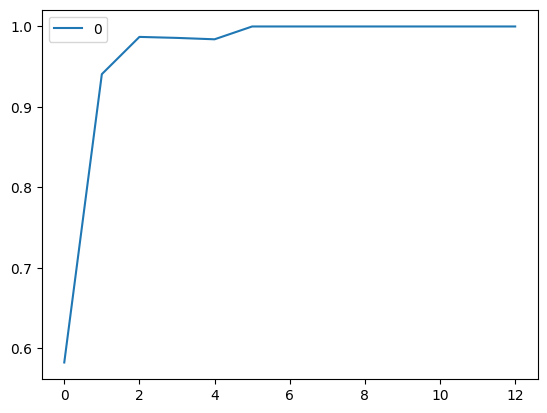

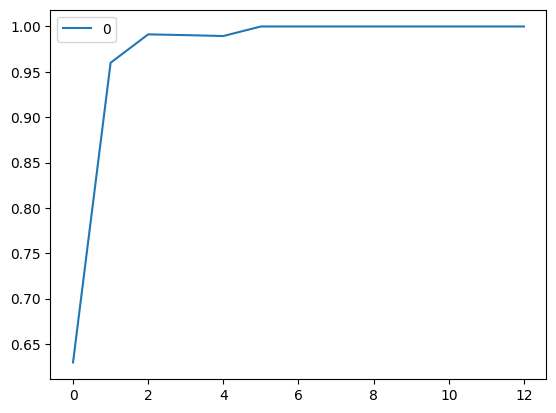

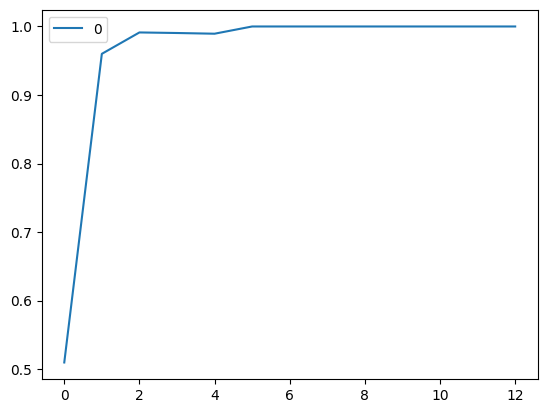

In [22]:
def active_learner(n_iter=10, num_samples=2, starting_size=5, r_state=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=starting_size, random_state=r_state)
  # initial fit
  clf_rf = RandomForestClassifier(random_state=r_state)
  mcc_scores=[]
  acc_scores=[]
  f1_scores=[]
  for iteration in range(n_iter): # Number of Iterations for the Active Learner
      clf_rf.fit(X_train, y_train)
      pred_q1 = clf_rf.predict_proba(X_test)


    # Calculate uncertainty
      uncertainty = (1 - np.max(pred_q1, axis=1)) * 100

    # Find indexes of the 2 most uncertain samples
      q_indexes = np.argsort(uncertainty)[-num_samples:]

    # Add these samples to the training set
      X_train = np.vstack((X_train, X_test[q_indexes]))
      y_train = np.concatenate((y_train, y_test[q_indexes]))

    # Remove these samples from the test set
      X_test = np.delete(X_test, q_indexes, axis=0)
      y_test = np.delete(y_test, q_indexes)

      if len(y_test) < num_samples:
        print("No more samples left to train")
        break
    # Retrain the model and compute MCC score
      y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
      mcc = matthews_corrcoef(y_test, y_pred)
      mcc_scores.append(mcc)
      acc = accuracy_score(y_test,y_pred)
      acc_scores.append(acc)
      f1 = f1_score(y_test,y_pred,average="weighted")
      f1_scores.append(f1)
  return(mcc_scores,acc_scores,f1_scores)

mcc_scores,acc,f1 = active_learner(15,10,5,43)
pd.DataFrame(mcc_scores).plot()
pd.DataFrame(acc).plot()
pd.DataFrame(f1).plot()